# Hackathon: Predicting Airbnb rental prices using ML

### What is a hackathon?

A hackathon is an event designed to use technology, primarily coding, to accomplish an objective. In this case, the development of a simple machine learning classifier.

<div class="alert alert-success">
<b>About Dataset</b>

<u>Context</u>

This dataset provides an in-depth look into the dynamic world of Airbnb accommodations across diverse locations in the USA. From cozy apartments in vibrant urban centers to tranquil retreats in scenic rural areas, it offers valuable insights into the wide range of lodging options available on the platform. With detailed information on property features, pricing, reviews, and host profiles, this dataset enables AI enthusiasts to explore the intricate ecosystem of shared lodging. It uncovers trends, patterns, and preferences that influence the ever-evolving landscape of modern hospitality. Whether examining market trends, evaluating the impact of tourism on local economies, or simply exploring global travel patterns, this dataset serves as a practical resource for understanding the multifaceted world of Airbnb accommodations.

<u>Content</u>

The contents are

<ol>
<li>log_price</li>
<li>property_type</li>
<li>amenities</li>
<li>accommodates</li>
<li>bathrooms</li>
<li>bed_type</li>
<li>cancellation_policy</li>
<li>city</li>
<li>first_review</li>
<li>host_has_profile_pic</li>
<li>host_identity_verified</li>
<li>host_response_rate</li>
<li>host_since</li>
<li>latitude</li>
<li>longitude</li>
<li>name</li>
<li>neighbourhood</li>
<li>number_of_reviews</li>
<li>review_scores_rating</li>
<li>zipcode</li>
<li>bedrooms</li>
<li>beds</li>
</ol>

 <u>Inspiration</u>

The goal is to apply machine learning regression algorithms to predict the price variable based on property features, reviews, and host profiles.
    
</div>

<div class="alert alert-info"><b>Task</b>

Pricing is often a challenging task for Airbnb hosts. The goal of this assignment is to demonstrate how machine learning can be applied to address this challenge. To achieve this, follow these steps: load the dataset, identify the target variable, convert it if necessary, explore and preprocess the data, build a regression model, and evaluate its performance using an appropriate metric.

Please remember to add comments explaining your decisions. Comments help us understand your thought process and ensure accurate evaluation of your work. This assignment requires code-based solutions—**manually calculated or hard-coded results will not be accepted**. Thoughtful comments and visualizations are encouraged and will be highly valued.

- Write your solution directly in this notebook, modifying it as needed, but do not remove the answer cell.
- Once completed, submit the notebook in **.ipynb** format via Moodle.
 
</div>

<div class="alert alert-warning"><b>Hints</b>

- Clearly define your target variable and choose the appropriate performance metric for evaluation.  
- The "Amenities" column contains valuable information—be sure to use it wisely.  
- If you encounter columns with date or time information, consider converting them to datetime format if they are relevant to the task.

</div>

<div class="alert alert-danger"><b>Submission deadline:</b> Monday, November 25th, 12:00

Do not over-complicate your code too much. Start with a simple working solution and refine it if you have time.
</div>


In [10]:
import numpy as np
import pandas as pd
from sklearn import set_config

set_config(transform_output="pandas")
data = pd.read_csv('https://github.com/jnin/information-systems/raw/refs/heads/main/data/Airbnb_Hackathon_IA1_2024.zip', compression='zip').convert_dtypes()
data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100,11201,1,1
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,2017-09-23,40.766115,-73.98904,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93,10019,3,3
2,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,<NA>,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,<NA>,94117.0,2,2
3,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,...,2017-09-05,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100,94131,1,1
4,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,LA,...,2017-04-21,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,<NA>,15,97,90292,1,1


### Step 1: Dropping Unnecessary Columns

We removed the following columns: `description`, `first_review`, `host_has_profile_pic`, `last_review`, `latitude`, `longitude`, `name`, `neighbourhood`, `zipcode`, and `host_response_rate`.

#### Reasons for Dropping:
- **Textual Columns**: `description` and `name` are unstructured data and require extensive preprocessing, with limited benefit to our model.
- **Date-Related Columns**: `first_review` and `last_review` may already be captured in aggregated features or are not directly useful.
- **Geographic Details**: `latitude` and `longitude` might overfit the model or introduce noise without proper spatial analysis.
- **Irrelevant Features**: Columns like `host_has_profile_pic` and `host_response_rate` likely have minimal impact on key outcomes like price.


In [11]:
# 1st step: eliminate the categories we thought were unecessary.

data.drop(columns=['description', 'first_review', 'host_has_profile_pic', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'zipcode', 'host_response_rate'], inplace=True)

### Step 2: Handling Missing Values and Transforming Columns

We applied transformations and imputations to clean the data and make it usable for modeling.

#### Steps Taken:
1. **Host Since**:
   - Converted `host_since` to datetime format and calculated the number of years since the host joined Airbnb.
   - Imputed missing values in `host_since` using the mean strategy.
2. **Bathrooms, Bedrooms, Beds, and Review Scores**:
   - Imputed missing values in these numeric columns using the mean strategy to avoid data loss.
3. **Host Identity Verified**:
   - Filled missing values with `False`, assuming that unverified hosts are marked as such.

#### Why?
- Imputation of missing values ensures that no data is excluded during modeling, which can happen if missing values are left untreated.
- Calculating `host_since` as years since joining creates a meaningful numerical feature.
- Handling categorical data like `host_identity_verified` ensures consistent representation.


In [12]:
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

imputer = SimpleImputer(strategy='mean')
today = pd.Timestamp.today()

data['host_since'] = pd.to_datetime(data['host_since'], format=None, errors='coerce')
data['host_since'] = today.year - data['host_since'].dt.year

data['bathrooms'] = imputer.fit_transform(data[['bathrooms']])
data['bedrooms'] = imputer.fit_transform(data[['bedrooms']])
data['beds'] = imputer.fit_transform(data[['beds']])
data['review_scores_rating'] = imputer.fit_transform(data[['review_scores_rating']])
data['host_identity_verified'].fillna(False, inplace=True)
data['host_since'] = imputer.fit_transform(data[['host_since']])

### Step 3: Categorizing Property Types

We created a function to group various property types into broader categories for simpler analysis and modeling.

#### Steps Taken:
1. **Defined Categories**:
   - Grouped property types into four distinct categories:
     - **Residential (0)**: Includes common dwellings like apartments, houses, and villas.
     - **Lodging Services (1)**: Includes properties like hostels, guesthouses, and vacation homes.
     - **Unique Stays (2)**: Includes unconventional options like treehouses, caves, and yurts.
     - **Vehicles and Shared Spaces (3)**: Includes mobile or minimalistic accommodations like RVs, boats, and dorms.
     - **Others (4)**: A fallback for any other property types not explicitly categorized.
2. **Applied Categorization**:
   - Used the `apply` method to transform the `property_type` column into numerical categories based on the defined groups.

In [13]:
def categorize_property(property_type):
    if property_type in [
        'Apartment', 'House', 'Condominium', 'Townhouse', 'Villa',
        'Loft', 'Serviced apartment', 'Guest suite', 'In-law', 'Bungalow'
    ]:
        return 0
    elif property_type in [
        'Hostel', 'Guesthouse', 'Bed & Breakfast', 'Boutique hotel',
        'Timeshare', 'Vacation home'
    ]:
        return 1
    elif property_type in [
        'Loft', 'Cabin', 'Treehouse', 'Yurt', 'Chalet', 'Earth House',
        'Hut', 'Tent', 'Cave', 'Lighthouse'
    ]:
        return 2
    elif property_type in [
        'Camper/RV', 'Boat', 'Train', 'Parking Space', 'Dorm'
    ]:
        return 3
    else:
        return 4

data['property_type'] = data['property_type'].apply(categorize_property)

### Step 4: Categorizing Room Types

We developed a function to transform the `room_type` column into numerical categories for more efficient analysis.

#### Steps Taken:
1. **Defined Categories**:
   - Mapped the different types of room availability to numerical values:
     - **Entire home/apt (0)**: The entire property is available to guests.
     - **Private room (1)**: Guests have access to a private room but share some spaces.
     - **Shared room (2)**: Guests share both sleeping and living spaces with others.
     - **Other (3)**: A catch-all for any unrecognized types.
2. **Applied Transformation**:
   - Used the `apply` method to convert the `room_type` column into these numeric categories.

In [14]:
def categorize_stay_type(stay_type):
    if stay_type == 'Entire home/apt':
        return 0
    elif stay_type == 'Private room':
        return 1
    elif stay_type == 'Shared room':
        return 2
    else:
        return 3

data['room_type'] = data['room_type'].apply(categorize_stay_type)

### Step 5: Categorizing and Encoding Amenities

We transformed the `amenities` column into four distinct binary features, representing key categories of amenities. 

#### Steps Taken:
1. **Defined Categories**:
   - Grouped common amenities into four logical categories:
     - **Essential**: Basic amenities expected in most accommodations (e.g., "Wireless Internet", "Kitchen").
     - **Luxury**: Features that provide a premium experience (e.g., "Pool", "Hot tub").
     - **Safety**: Items contributing to guest safety (e.g., "Smoke detector", "Fire extinguisher").
     - **Entertainment**: Items focused on guest enjoyment (e.g., "TV", "Cable TV").
2. **Created Classification Function**:
   - Checked the presence of amenities from each category in the `amenities` string.
   - Assigned a binary value (`1` if present, `0` otherwise) for each category.
3. **Applied Transformation**:
   - Used the `apply` method to process the `amenities` column and create four new binary columns: `essential`, `luxury`, `safety`, `entertainment`.
4. **Dropped Original Column**:
   - Removed the `amenities` column to avoid redundancy.

In [15]:
categories = {
    "essential": ["Wireless Internet", "Air conditioning", "Heating", "Kitchen", "Essentials", "Washer", "Dryer"],
    "luxury": ["Pool", "Hot tub", "Gym", "Elevator in building", "Indoor fireplace"],
    "safety": ["Smoke detector", "Carbon monoxide detector", "Fire extinguisher", "First aid kit"],
    "entertainment": ["TV", "Cable TV", "Internet", "Buzzer/wireless intercom"],
}

# Function to classify amenities into categories
def classify_amenities(amenity_string):
    essential, luxury, safety, entertainment = 0, 0, 0, 0
    for amenity in categories["essential"]:
        if amenity in amenity_string:
            essential = 1
    for amenity in categories["luxury"]:
        if amenity in amenity_string:
            luxury = 1
    for amenity in categories["safety"]:
        if amenity in amenity_string:
            safety = 1
    for amenity in categories["entertainment"]:
        if amenity in amenity_string:
            entertainment = 1
    return essential, luxury, safety, entertainment

# Apply the function to the DataFrame
data[["essential", "luxury", "safety", "entertainment"]] = data["amenities"].apply(lambda x: pd.Series(classify_amenities(x)))

data.drop(columns='amenities', inplace=True)

### Step 6: Encoding Additional Features

We encoded several categorical features into numeric representations to make them suitable for machine learning models.

#### Steps Taken:

1. **Encoding `bed_type`**:
   - Used `OrdinalEncoder` to convert `bed_type` into ordinal values based on predefined hierarchy:
     - **Order**: "Real Bed" → "Airbed" → "Pull-out Sofa" → "Futon" → "Couch".
   - **Purpose**: Capture the relative quality of bed types as numerical data.

2. **One-Hot Encoding `city`**:
   - Applied `pd.get_dummies` to create binary columns for each unique city.
   - Each city is represented as a distinct feature (e.g., `city_New York`, `city_San Francisco`).
   - **Purpose**: Preserve categorical relationships without imposing ordinal assumptions.

3. **Encoding `cancellation_policy`**:
   - Used `OrdinalEncoder` to assign numeric values based on cancellation policy flexibility:
     - **Order**: "super_strict_60" → "super_strict_30" → "strict" → "moderate" → "flexible".
   - **Purpose**: Reflect varying levels of guest flexibility numerically.


In [16]:
from sklearn.preprocessing import OrdinalEncoder

scaler = OrdinalEncoder(categories=[['Real Bed', 'Airbed', 'Pull-out Sofa', 'Futon', 'Couch']])
data['bed_type'] = scaler.fit_transform(data[['bed_type']])

data = pd.get_dummies(data, columns=['city'], prefix='city')

scaler = OrdinalEncoder(categories=[['super_strict_60', 'super_strict_30', 'strict', 'moderate', 'flexible']])
data['cancellation_policy'] = scaler.fit_transform(data[['cancellation_policy']])

### Step 7: Data Scaling and Splitting

We standardized the dataset and split it into training and testing subsets for model training and evaluation.

#### Steps Taken:

1. **Standardizing the Data**:
   - Used `StandardScaler` to scale the features:
     - Ensures that all features have a mean of 0 and a standard deviation of 1.
     - Prevents features with larger numerical ranges from dominating the model's learning process.

2. **Defining Features and Target**:
   - **Features (`X`)**: Excluded the target variable, `log_price`.
   - **Target (`y`)**: Isolated `log_price` as the dependent variable.

3. **Splitting the Data**:
   - Used `train_test_split` to partition the dataset:
     - **Training Set**: 80% of the data for model training.
     - **Test Set**: 20% of the data for model evaluation.
     - Ensured reproducibility by setting `random_state=42`.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

scaler = StandardScaler()
data = scaler.fit_transform(data)

X = data.drop(columns='log_price')
y = data['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

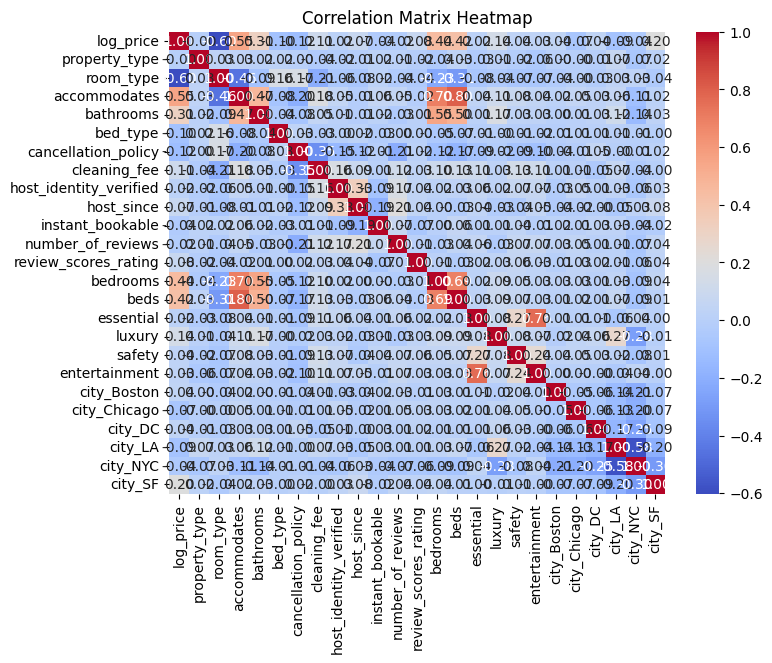

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
# Regression Models (for continuous targets)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor

### Step 8: Model Training and Evaluation

In this step, we trained the model and evaluated its performance using multiple metrics.

#### Steps Taken:

1. **Model Selection**:
   - We used the `XGBRegressor` (Extreme Gradient Boosting Regressor) for regression. This model is often preferred for its high performance on structured/tabular data.

2. **Model Training**:
   - The model was trained using the training dataset (`X_train` and `y_train`).

3. **Prediction**:
   - The trained model was used to predict the target variable (`log_price`) on the test set (`X_test`).

4. **Evaluation Metrics**:
   - **R-squared (R²)**: Measures how well the model explains the variance in the target variable. An R² value closer to 1 indicates a better fit.
   - **Root Mean Squared Error (RMSE)**: Measures the average magnitude of the errors in the predictions. A lower RMSE indicates better model performance.


In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model = XGBRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R-squared: 0.60
Root Mean Squared Error (RMSE): 0.63


### Step 9: Hyperparameter Tuning with GridSearchCV

In this step, we used **GridSearchCV** to find the optimal hyperparameters for our RandomForestRegressor model, aiming to improve the model's performance.

#### Steps Taken:

1. **Parameter Grid**:
   - Defined a set of hyperparameters (`param_grid`) to search over:
     - `n_estimators`: Number of trees in the forest.
     - `max_depth`: Maximum depth of the trees.
     - `min_samples_split`: Minimum number of samples required to split an internal node.
     - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2:.2f}")

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
